In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('loans.csv')

In [3]:
data.shape

(6019, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_number              6019 non-null   int64 
 1   loan_amount            6019 non-null   int64 
 2   lender_count           6019 non-null   int64 
 3   status                 6019 non-null   object
 4   funded_date            5082 non-null   object
 5   funded_amount          6019 non-null   int64 
 6   repayment_term         6019 non-null   int64 
 7   location_country_code  6002 non-null   object
 8   sector                 6019 non-null   object
 9   description            5677 non-null   object
 10  use                    5677 non-null   object
dtypes: int64(5), object(6)
memory usage: 517.4+ KB


In [5]:
 data.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN


In [6]:
data['status'].unique()

array(['funded', 'fundraising', 'expired'], dtype=object)

In [7]:
print('missing values:', data.isnull().sum())

missing values: id_number                  0
loan_amount                0
lender_count               0
status                     0
funded_date              937
funded_amount              0
repayment_term             0
location_country_code     17
sector                     0
description              342
use                      342
dtype: int64


In [8]:
data['description'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: description, dtype: object

In [9]:
data['use'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: use, dtype: object

In [10]:
df = data[['loan_amount', 'lender_count', 'repayment_term']]
df

,loan_amount,lender_count,repayment_term
0,4825,60,8
1,975,34,12
2,950,25,14
3,825,28,14
4,725,21,13
...,...,...,...
6014,200,8,14
6015,200,8,14
6016,200,6,14
6017,200,8,14


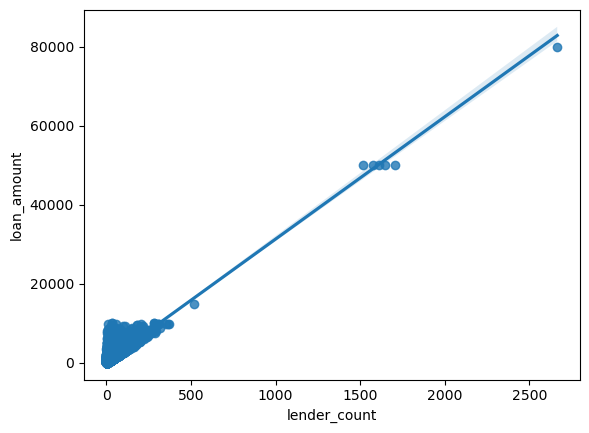

In [11]:
ax = sns.regplot(x='lender_count', y='loan_amount', data=df)

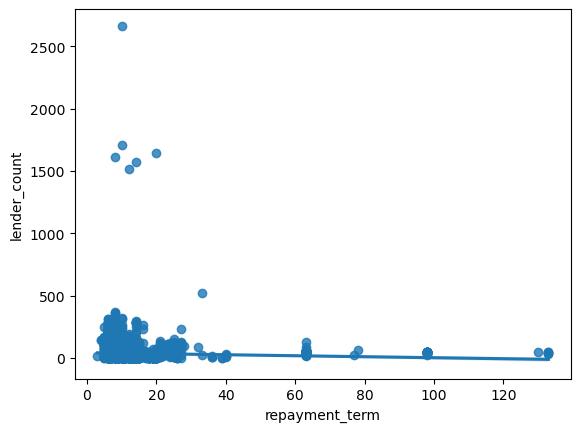

In [12]:
ax = sns.regplot(x= 'repayment_term', y='lender_count', data=df)

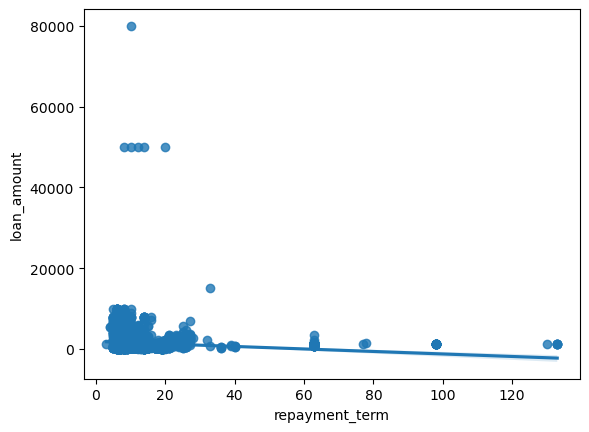

In [13]:
ax = sns.regplot(x= 'repayment_term', y='loan_amount', data=df)

In [14]:
print('missing values:', df.isnull().sum())

missing values: loan_amount       0
lender_count      0
repayment_term    0
dtype: int64


In [15]:
y = df['lender_count']
x = df.drop(['lender_count'], axis = 1)

print(y)

0       60
1       34
2       25
3       28
4       21
        ..
6014     8
6015     8
6016     6
6017     8
6018     8
Name: lender_count, Length: 6019, dtype: int64


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=42)

In [17]:
y_train

742       8
4105     18
4393     49
2638     76
1608     50
       ... 
3772     46
5191     19
5226     98
5390    115
860     175
Name: lender_count, Length: 5417, dtype: int64

In [18]:
x_train

,loan_amount,repayment_term
742,275,20
4105,500,8
4393,1525,63
2638,2475,6
1608,1400,11
...,...,...
3772,1875,8
5191,700,8
5226,3150,6
5390,3425,6


In [19]:
x_test

,loan_amount,repayment_term
2868,4850,9
5924,200,14
3764,3775,9
4144,500,8
2780,2500,6
...,...,...
1344,575,14
5071,225,14
3206,3325,7
2687,1975,6


In [20]:
y_test

2868    145
5924      8
3764    121
4144     18
2780      7
       ... 
1344     20
5071      3
3206    126
2687      6
2671     27
Name: lender_count, Length: 602, dtype: int64

In [21]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [22]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

In [23]:
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
predictions = lr.predict(x_train)

In [25]:
lr.score(x_train, y_train)

0.8206906137598728

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest Classifier with 100 trees
random_forest = RandomForestClassifier(n_estimators=100)

# Training data (X_train) and corresponding labels (y_train) should be defined before this point
# Assuming you have X_train and y_train already defined

# Train the model
random_forest.fit(x_train, y_train)

# Once trained, you can use the model to make predictions on new data (X_test)
y_pred = random_forest.predict(x_test)


In [27]:
print(y_train)

742       8
4105     18
4393     49
2638     76
1608     50
       ... 
3772     46
5191     19
5226     98
5390    115
860     175
Name: lender_count, Length: 5417, dtype: int64


In [28]:
random_forest.score(x_train, y_train)

0.48772383237954586

In [29]:
import pickle
pickle.dump(random_forest, open('lr.pkl', 'wb'))